<a href="https://colab.research.google.com/github/mancatha/P5/blob/main/P5model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install transformers
!pip install transformers[torch] --upgrade
!pip install accelerate -U
!pip install -U huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 123.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.3 MB/s eta 0:00:00
  Using cached huggingface_hub-0.18.0-py3-none-any.whl (301 kB)
  Attemptin

In [2]:
import os
import pandas as pd
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
import torch
from huggingface_hub import notebook_login

In [3]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [4]:
#downloding the train file from github using the url
!wget -O Train.csv "https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/blob/master/zindi_challenge/data/Train.csv"

--2023-11-07 10:54:23--  https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/blob/master/zindi_challenge/data/Train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5330 (5.2K) [text/plain]
Saving to: ‘Train.csv’

Train.csv           100%[===================>]   5.21K  --.-KB/s    in 0s      

2023-11-07 10:54:24 (56.2 MB/s) - ‘Train.csv’ saved [5330/5330]



In [ ]:
#downloding the train file from github using the url
!wget -O Train.csv "https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/blob/master/zindi_challenge/data/Test.csv"

In [5]:
# Load the dataset and display some values
#df = pd.read_csv('../data/Train.csv')
df = pd.read_csv("https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/raw/master/zindi_challenge/data/Train.csv")



# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]

In [6]:

# Load the dataset from the raw URL
url = "https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/raw/master/zindi_challenge/data/Test.csv"
df_test = pd.read_csv(url)

# Remove rows containing NaN values
df_test = df_test[~df_test.isna().any(axis=1)]

In [7]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   9999 non-null   object 
 1   safe_text  9999 non-null   object 
 2   label      9999 non-null   float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [9]:
df.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [10]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# To count the number of duplicates, you can use the following:
num_duplicates = duplicates.sum()

# Display the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [11]:
df_test.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [12]:
df_test.isnull().sum()

tweet_id     0
safe_text    0
dtype: int64

#Analytic Questions:

1. What is the distribution of sentiment labels ('label') in the dataset, and how many tweets are positive, negative, or neutral?

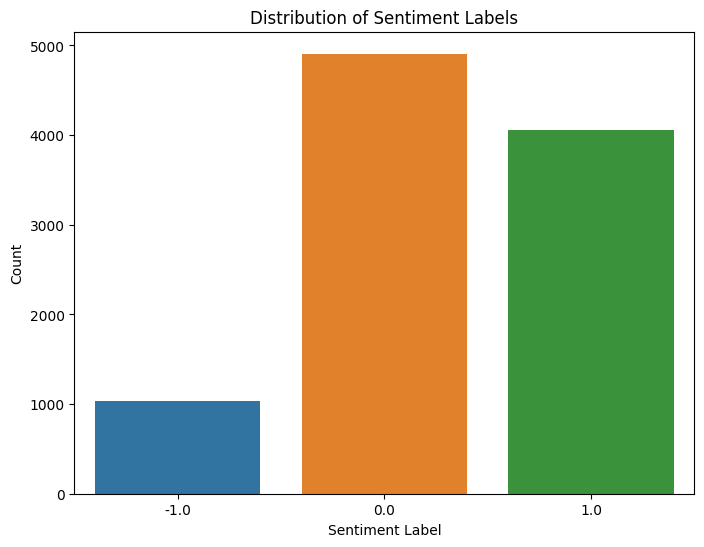

In [13]:
# Count the occurrences of each sentiment label
sentiment_counts = df['label'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")

# Customize the labels if needed
plt.xticks(rotation=360)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

From the the graph those who tweet neutral are about 5000.

 2. Is there a relationship between the 'agreement' scores among annotators and the sentiment labels assigned to tweets?

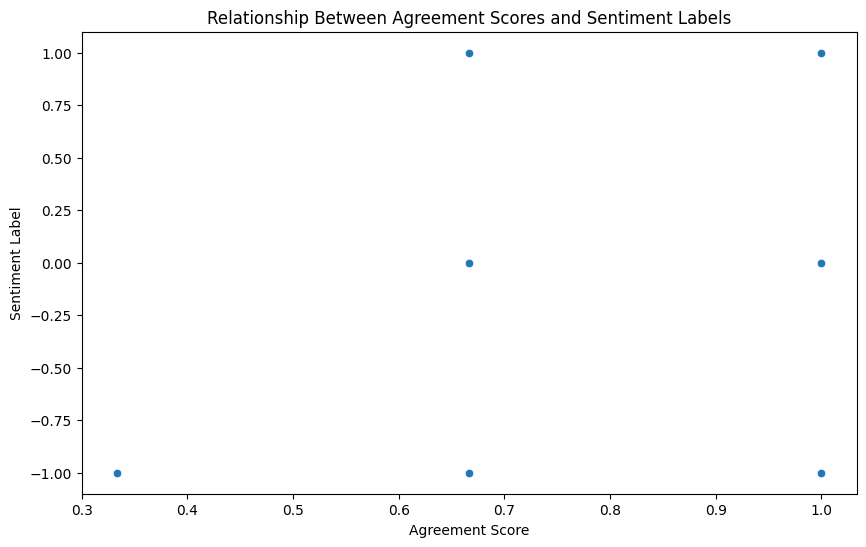

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='agreement', y='label', data=df)

# Add labels and title
plt.title("Relationship Between Agreement Scores and Sentiment Labels")
plt.xlabel("Agreement Score")
plt.ylabel("Sentiment Label")

# Customize the plot as needed

# Show the plot
plt.show()

from the graph we can see  a pattern, you might see data points clustering or forming a trend line. if tweets with higher 'agreement' scores tend to have more positive sentiment labels, you may observe an upward trend in the scatter plot.


3. How do the agreement scores among annotators vary in the dataset?

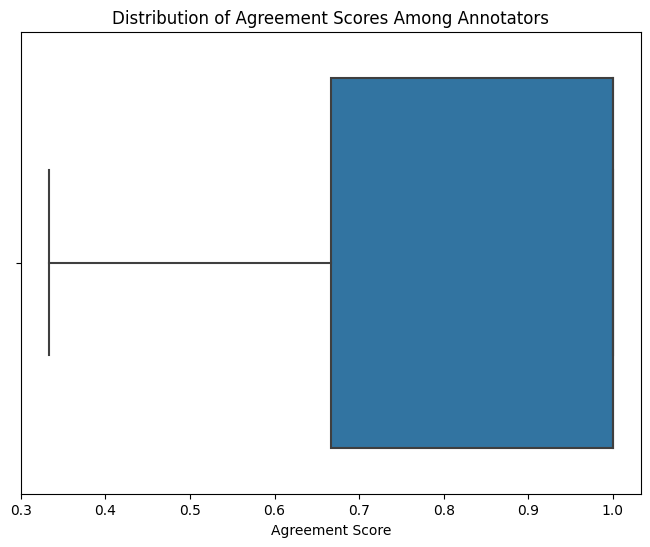

In [15]:
# Create a box plot to visualize the distribution of agreement scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='agreement')

# Add labels and title
plt.title("Distribution of Agreement Scores Among Annotators")
plt.xlabel("Agreement Score")

# Show the plot
plt.show()

since in this graph the agreement score in this range signifies a high level of consensus among annotators. It suggests that most annotators are in close agreement regarding the labeling of the data. An agreement score of 1.0 indicates perfect agreement among all annotators.

In [16]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [17]:
train.head()

,tweet_id,safe_text,label,agreement
9305,YMRMEDME,Mickey's Measles has gone international <url>,0.0,1.000000
3907,5GV8NEZS,S1256 [NEW] Extends exemption from charitable ...,0.0,1.000000
795,EI10PS46,<user> your ignorance on vaccines isn't just ...,1.0,0.666667
5793,OM26E6DG,Pakistan partly suspends polio vaccination pro...,0.0,1.000000
3431,NBBY86FX,In other news I've gone up like 1000 mmr,0.0,1.000000


In [18]:
eval.head()

,tweet_id,safe_text,label,agreement
6571,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1.0,1.000000
1754,2DD250VN,<user> no. I was properly immunized prior to t...,1.0,1.000000
3325,ESEVBTFN,<user> thx for posting vaccinations are impera...,1.0,1.000000
1485,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1.0,0.666667
4175,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1.0,1.000000


In [19]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 4), eval is (2000, 4)


In [20]:
# Save splitted subsets
train.to_csv("train_subset.csv", index=False)
eval.to_csv("eval_subset.csv", index=False)

In [21]:
#after saving our dataset we load the dataset
dataset = load_dataset('csv',
                        data_files={'train': 'train_subset.csv',
                        'eval': 'eval_subset.csv'}, encoding = "ISO-8859-1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [22]:

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

(…)-base-sentiment/resolve/main/config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

(…)a-base-sentiment/resolve/main/vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

(…)a-base-sentiment/resolve/main/merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

(…)ent/resolve/main/special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [23]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [25]:
# Load your model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", num_labels=3)
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [26]:
# Split the dataset into training and evaluation sets
train_dataset = dataset['train']
eval_dataset = dataset['eval']

In [27]:
training_args = TrainingArguments(
    output_dir="sentiment_analysis",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    num_train_epochs=5,
    load_best_model_at_end=True,
    push_to_hub = True
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [28]:
from datasets import load_metric
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(y_true=labels, y_pred=predictions, average='weighted')
    precision = precision_score(y_true=labels, y_pred=predictions, average='weighted')
    recall = recall_score(y_true=labels, y_pred=predictions, average='weighted')
    return {"f1": f1, "precision": precision, "recall": recall}

In [29]:
train_dataset = dataset['train'].shuffle(seed=10)
eval_dataset = dataset['eval'].shuffle(seed=10)

In [30]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,padding ='max_length',return_tensors='pt')

In [34]:
notebook_login()

In [35]:
 #Initialize the trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),  # DataCollatorWithPadding is correctly imported
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,

)

In [36]:
# Train the model
trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1,Precision,Recall
1,0.624300,0.651519,0.772467,0.789957,0.777000
2,0.476200,0.651803,0.787996,0.801719,0.785000
3,0.351400,0.795279,0.786603,0.793147,0.786000
4,0.217800,1.155745,0.779573,0.788604,0.782500
5,0.129100,1.325136,0.780829,0.783407,0.780500


TrainOutput(global_step=5000, training_loss=0.3668963302612305, metrics={'train_runtime': 626.5761, 'train_samples_per_second': 63.831, 'train_steps_per_second': 7.98, 'total_flos': 874433290829490.0, 'train_loss': 0.3668963302612305, 'epoch': 5.0})

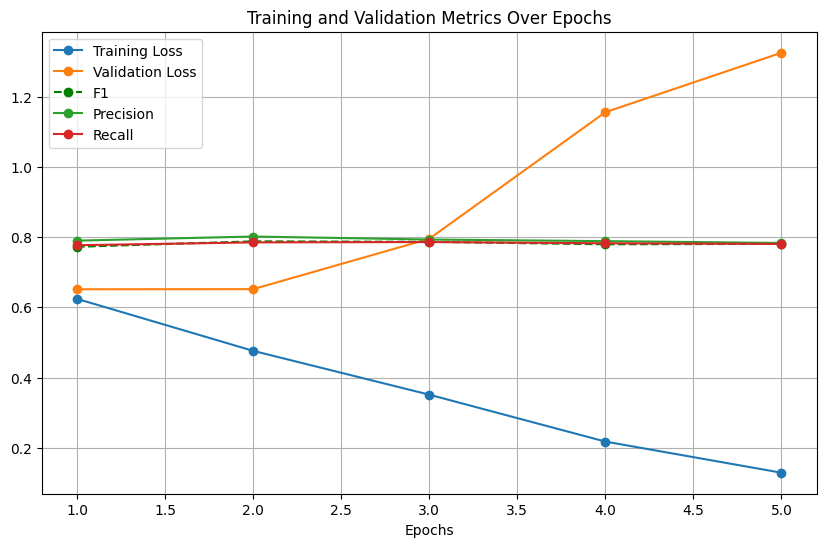

In [2]:
import matplotlib.pyplot as plt

# Sample data
epochs = [1, 2, 3, 4, 5]
training_loss = [0.624300, 0.476200, 0.351400, 0.217800, 0.129100]
validation_loss = [0.651519, 0.651803, 0.795279, 1.155745, 1.325136]
f1 = [0.772467, 0.787996, 0.786603, 0.779573, 0.780829]
precision = [0.789957, 0.801719, 0.793147, 0.788604, 0.783407]
recall = [0.777000, 0.785000, 0.786000, 0.782500, 0.780500]

# Create a single plot for all metrics
plt.figure(figsize=(10, 6))
plt.title("Training and Validation Metrics Over Epochs")
plt.xlabel("Epochs")
plt.grid()

# Plot Training Loss
plt.plot(epochs, training_loss, label='Training Loss', marker='o')

# Plot Validation Loss
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')

# Plot F1
plt.plot(epochs, f1, label='F1', marker='o', linestyle='--', color='green')


# Plot Precision
plt.plot(epochs, precision, label='Precision', marker='o')

# Plot Recall
plt.plot(epochs, recall, label='Recall', marker='o')

plt.legend()
plt.show()


In [38]:
# Initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),  # DataCollatorWithPadding is correctly imported
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [39]:
# Launch the final evaluation
trainer.evaluate()

{'eval_loss': 0.6515192985534668,
 'eval_f1': 0.7724671224252192,
 'eval_precision': 0.7899570820695955,
 'eval_recall': 0.777,
 'eval_runtime': 9.4868,
 'eval_samples_per_second': 210.82,
 'eval_steps_per_second': 26.352}

In [40]:
trainer.push_to_hub("")

events.out.tfevents.1699356074.561278627e68.1424.1:   0%|          | 0.00/437 [00:00<?, ?B/s]

'https://huggingface.co/benmanks/sentiment_analysis/tree/main/'

In [43]:
tokenizer.push_to_hub( "sentiment_analysis")

CommitInfo(commit_url='https://huggingface.co/benmanks/sentiment_analysis/commit/e40461fa9de1f10de3a5ec9b4f5dcc59e8bf12a0', commit_message='Upload tokenizer', commit_description='', oid='e40461fa9de1f10de3a5ec9b4f5dcc59e8bf12a0', pr_url=None, pr_revision=None, pr_num=None)

In [44]:
from transformers import AutoConfig
model_path = f"sentiment_analysis"
config = AutoConfig.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [45]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [46]:
from scipy.special import softmax
# Input preprocessing
text = "Covid cases are increasing fast!"
text = preprocess(text)

# PyTorch-based models
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [47]:
config.id2label = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

In [48]:
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) NEUTRAL 0.9932
2) POSITIVE 0.0049
3) NEGATIVE 0.0019
